[(7.5, 8.5, 92.5, 155.5), (261.5, 11.5, 339.5, 156.5), (171.5, 13.5, 247.5, 128.5), (115.5, 14.5, 160.5, 132.5), (347.5, 20.5, 496.5, 129.5), (150.5, 147.5, 232.5, 292.5), (389.5, 147.5, 483.5, 298.5), (240.5, 165.5, 375.5, 287.5), (15.5, 172.5, 135.5, 228.5), (2.5, 239.5, 138.5, 423.5), (237.5, 299.5, 323.5, 421.5), (334.5, 300.5, 492.5, 411.5), (145.5, 307.5, 223.5, 419.5)]


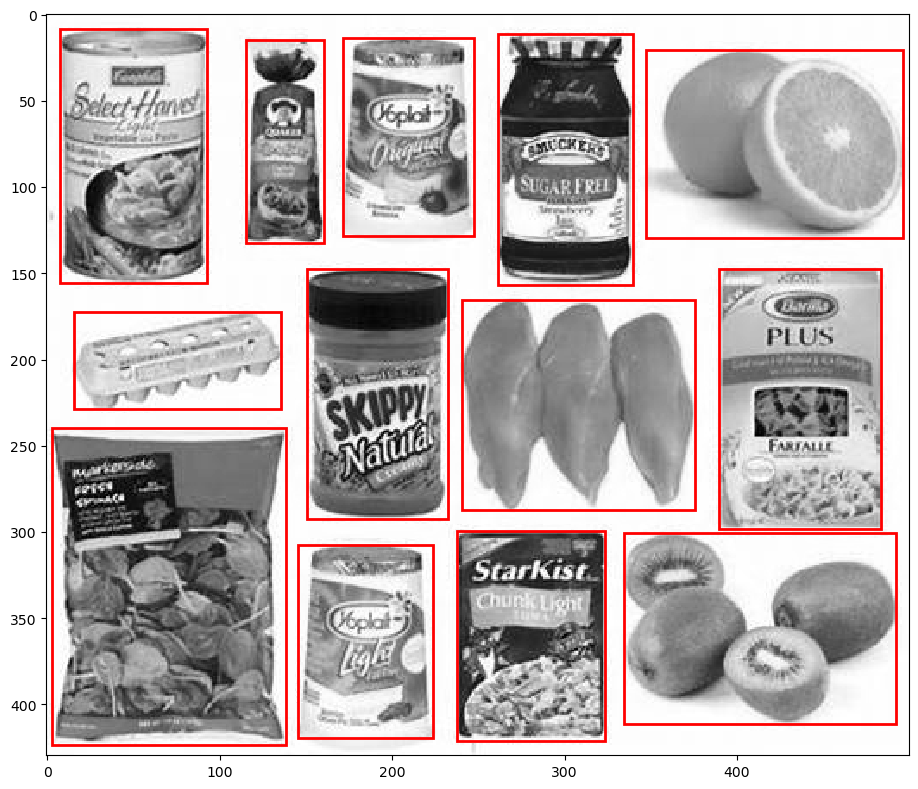

In [1]:
# code
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray
import skimage.io as io
import skimage 
import scipy.ndimage as nd
from skimage.filters import sobel
from skimage.measure import find_contours
from skimage.morphology import closing, square
from matplotlib.patches import Rectangle
plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

# load images and convert grayscale
img=io.imread("dataset/objs.jpg")
img = rgb2gray(img)
edges = canny(img,sigma=3)
closed = closing(img < 0.9, square(3))
# fill_im = nd.binary_fill_holes(edges)

contours = find_contours(closed, 0.5)
plt.imshow(closed, cmap='gray')
rectangle_positions = []
# Draw rectangles around the closed regions
for contour in contours:
    minr, minc, maxr, maxc = np.min(contour[:, 0]), np.min(contour[:, 1]), np.max(contour[:, 0]), np.max(contour[:, 1])
    rect = Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    # plt.gca().add_patch(rect)
    rect_area = (maxr - minr) * (maxc - minc)
    if rect_area > 5000:
        rect = Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        rectangle_positions.append((minc, minr, maxc, maxr))
        
print(rectangle_positions)
skimage.io.imshow(img)
skimage.io.show()


